# Exploratory Data Analysis of Credit Card Fraud

This dataset consists of credit card transactions in the western United States. It includes information about each transaction including customer details, the merchant and category of purchase, and whether or not the transaction was a fraud.

In [87]:
import pandas as pd 
ccf = pd.read_csv('D:\\RUPA\\GIT - DA\\credit_card_fraud.csv') 
ccf.head(5)

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,"Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0
1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0
2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,1945-12-21,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0
3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0
4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"Education officer, museum",1967-08-02,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0


In [79]:
#obtain count of number of entries and data type
ccf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339607 entries, 0 to 339606
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  339607 non-null  object 
 1   merchant               339607 non-null  object 
 2   category               339607 non-null  object 
 3   amt                    339607 non-null  float64
 4   city                   339607 non-null  object 
 5   state                  339607 non-null  object 
 6   lat                    339607 non-null  float64
 7   long                   339607 non-null  float64
 8   city_pop               339607 non-null  int64  
 9   job                    339607 non-null  object 
 10  dob                    339607 non-null  object 
 11  trans_num              339607 non-null  object 
 12  merch_lat              339607 non-null  float64
 13  merch_long             339607 non-null  float64
 14  is_fraud               339607 non-nu

In [80]:
#obtain count of null values
ccf.isnull().sum()

trans_date_trans_time    0
merchant                 0
category                 0
amt                      0
city                     0
state                    0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [88]:
#trans-num field is not necessary. So removing it
ccf=ccf.drop('trans_num', axis=1)

In [82]:
ccf.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,"Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0
1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0
2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,1945-12-21,41.657520,-122.230347,0
3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,32.863258,-106.520205,0
4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"Education officer, museum",1967-08-02,43.753735,-111.454923,0


In [89]:
#convert string to date-time type so that we can use date-time functions
ccf['trans_date_trans_time_dt']=pd.to_datetime(ccf['trans_date_trans_time'])

In [91]:
#generate year-month from date-time object
ccf['year_month']=ccf['trans_date_trans_time_dt'].dt.strftime('%Y-%m')

In [92]:
ccf['year_month']

0         2019-01
1         2019-01
2         2019-01
3         2019-01
4         2019-01
           ...   
339602    2020-12
339603    2020-12
339604    2020-12
339605    2020-12
339606    2020-12
Name: year_month, Length: 339607, dtype: object

In [93]:
#split the date and time in trans_date_time field (string)
trans_date_time= ccf['trans_date_trans_time'].str.split(" ", n=1, expand=True)

In [94]:
trans_date_time.head()

,0,1
0,2019-01-01,00:00:44
1,2019-01-01,00:00:51
2,2019-01-01,00:07:27
3,2019-01-01,00:09:03
4,2019-01-01,00:21:32


In [95]:
#generate date field (still a string)
ccf['trans_date']=trans_date_time.loc[:,0]

In [96]:
ccf['trans_date'].head()

0    2019-01-01
1    2019-01-01
2    2019-01-01
3    2019-01-01
4    2019-01-01
Name: trans_date, dtype: object

In [100]:
#drop unwanted columns
ccf.drop(['trans_date_trans_time','trans_date_trans_time_dt'] ,axis=1,inplace=True)

In [101]:
ccf['category'].unique()

array(['grocery_pos', 'entertainment', 'shopping_pos', 'misc_pos',
       'shopping_net', 'gas_transport', 'misc_net', 'grocery_net',
       'food_dining', 'health_fitness', 'kids_pets', 'home',
       'personal_care', 'travel'], dtype=object)

In [12]:
#find the number of fraudulent transactions
ccf.groupby('is_fraud').count()

,merchant,category,amt,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,trans_date
is_fraud,,,,,,,,,,,,,
0,337825,337825,337825,337825,337825,337825,337825,337825,337825,337825,337825,337825,337825
1,1782,1782,1782,1782,1782,1782,1782,1782,1782,1782,1782,1782,1782


In [102]:
#create fraud dataset
fraud=ccf[ccf['is_fraud']==1]

In [103]:
fraud.head()

,merchant,category,amt,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,year_month,trans_date
945,"Stokes, Christiansen and Sipes",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"Administrator, education",1939-11-09,65.654142,-164.722603,1,2019-01,2019-01-04
1077,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"Administrator, education",1939-11-09,65.468863,-165.473127,1,2019-01,2019-01-04
1184,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"Administrator, education",1939-11-09,65.347667,-165.914542,1,2019-01,2019-01-04
1192,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"Administrator, education",1939-11-09,64.445035,-166.080207,1,2019-01,2019-01-04
1202,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"Administrator, education",1939-11-09,65.447094,-165.446843,1,2019-01,2019-01-04


In [20]:
#find the number of fraudulent transactions in every category
data1=fraud.groupby('category').count()['is_fraud'].sort_values(ascending=False)

In [21]:
data1

category
grocery_pos       433
shopping_net      381
misc_net          217
shopping_pos      187
gas_transport     153
misc_pos           62
entertainment      55
kids_pets          55
personal_care      55
home               50
food_dining        38
health_fitness     36
travel             33
grocery_net        27
Name: is_fraud, dtype: int64

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

[Text(0.5, 1.0, 'FRAUD TRANSACTIONS BY CATEGORY')]

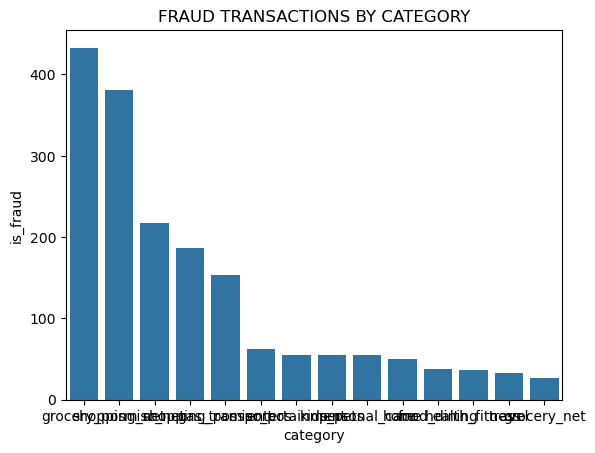

In [23]:
sns.barplot(data=data1).set(title='FRAUD TRANSACTIONS BY CATEGORY')

C:\Users\yrupa\AppData\Local\Temp\ipykernel_9508\3855843957.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, 'grocery_pos'),
 Text(1, 0, 'shopping_net'),
 Text(2, 0, 'misc_net'),
 Text(3, 0, 'shopping_pos'),
 Text(4, 0, 'gas_transport'),
 Text(5, 0, 'misc_pos'),
 Text(6, 0, 'entertainment'),
 Text(7, 0, 'kids_pets'),
 Text(8, 0, 'personal_care'),
 Text(9, 0, 'home'),
 Text(10, 0, 'food_dining'),
 Text(11, 0, 'health_fitness'),
 Text(12, 0, 'travel'),
 Text(13, 0, 'grocery_net')]

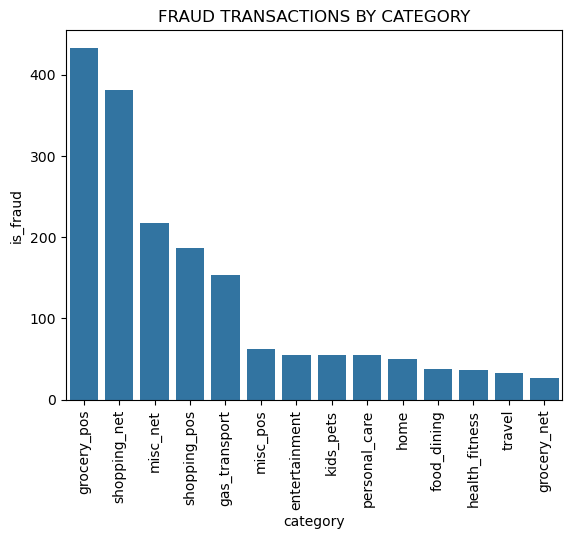

In [24]:
#avoid overlapping x-axis labels
ax=sns.barplot(data=data1)
ax.set(title='FRAUD TRANSACTIONS BY CATEGORY')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

C:\Users\yrupa\AppData\Local\Temp\ipykernel_9508\3255492498.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")


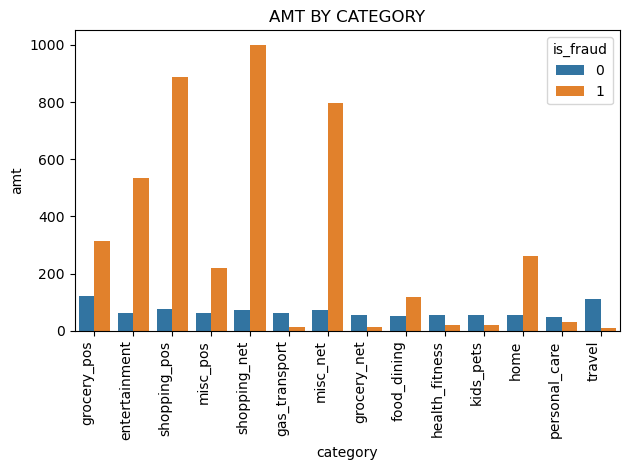

In [25]:
ax=sns.barplot(data=ccf, x='category', y='amt', hue='is_fraud',errorbar=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title('AMT BY CATEGORY')
plt.tight_layout()
plt.show()

C:\Users\yrupa\AppData\Local\Temp\ipykernel_9508\1414763599.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="right")


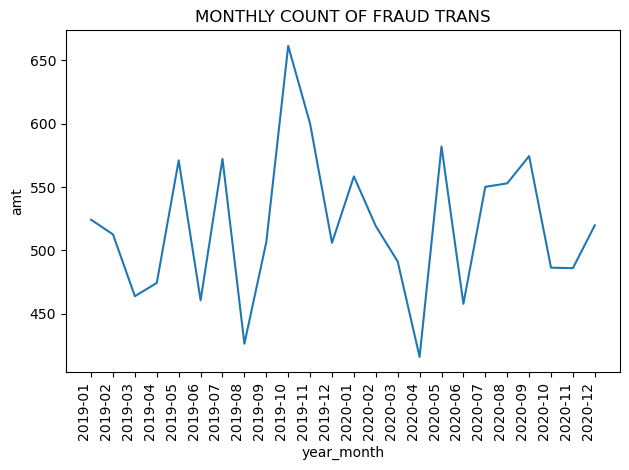

In [104]:
ax1=sns.lineplot(data=fraud, x='year_month', y='amt',errorbar=None)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="right")
plt.title('MONTHLY COUNT OF FRAUD TRANS')
plt.tight_layout()
plt.show()

In [26]:
fraud_state=fraud[["state","is_fraud"]]

In [27]:
fraud_state

,state,is_fraud
945,AK,1
1077,AK,1
1184,AK,1
1192,AK,1
1202,AK,1
...,...,...
322261,CA,1
322468,CA,1
322821,CA,1
322846,CA,1


C:\Users\yrupa\AppData\Local\Temp\ipykernel_9508\3419029560.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="right")


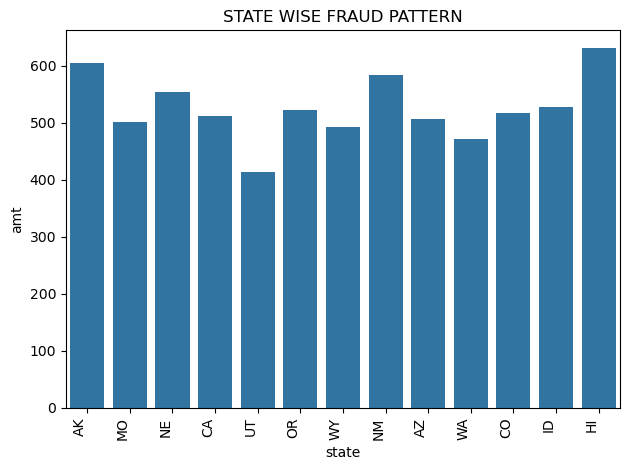

In [30]:
ax1=sns.barplot(data=fraud, x='state', y='amt',errorbar=None)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="right")
plt.title('STATE WISE FRAUD PATTERN')
plt.tight_layout()
plt.show()


C:\Users\yrupa\AppData\Local\Temp\ipykernel_10324\3621630950.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="right")


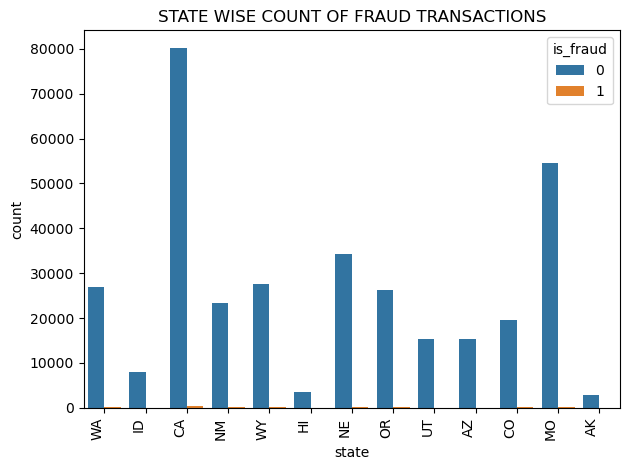

In [88]:
ax1=sns.countplot(data=ccf, x='state', hue='is_fraud')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="right")
plt.title('STATE WISE COUNT OF FRAUD TRANSACTIONS')
plt.tight_layout()
plt.show()

In [31]:
#find percentage of fradulent transactions

In [49]:
A=fraud.groupby(['state']).count()['is_fraud']
A

state
AK     50
AZ     64
CA    402
CO    115
HI     16
ID     33
MO    262
NE    216
NM    121
OR    197
UT     61
WA    126
WY    119
Name: is_fraud, dtype: int64

In [50]:
B=ccf.groupby(['state']).count()['is_fraud']
B

state
AK     2963
AZ    15362
CA    80495
CO    19766
HI     3649
ID     8035
MO    54904
NE    34425
NM    23427
OR    26408
UT    15357
WA    27040
WY    27776
Name: is_fraud, dtype: int64

In [51]:
new2=df = pd.merge(A, B, right_index = True, left_index = True)

In [52]:
new2

,is_fraud_x,is_fraud_y
state,,
AK,50,2963
AZ,64,15362
CA,402,80495
CO,115,19766
HI,16,3649
ID,33,8035
MO,262,54904
NE,216,34425
NM,121,23427


In [53]:
new2.columns = ['FRAUD TRANS COUNT', 'TOTAL TRANS COUNT']

In [54]:
new2

,FRAUD TRANS COUNT,TOTAL TRANS COUNT
state,,
AK,50,2963
AZ,64,15362
CA,402,80495
CO,115,19766
HI,16,3649
ID,33,8035
MO,262,54904
NE,216,34425
NM,121,23427


In [61]:
new2['percentage of fraud (%)']=((new2['FRAUD TRANS COUNT']/new2['TOTAL TRANS COUNT'])*100).round(2)

In [64]:
new2

,state,FRAUD TRANS COUNT,TOTAL TRANS COUNT,percentage of fraud (%)
0,AK,50,2963,1.69
1,AZ,64,15362,0.42
2,CA,402,80495,0.50
3,CO,115,19766,0.58
4,HI,16,3649,0.44
5,ID,33,8035,0.41
6,MO,262,54904,0.48
7,NE,216,34425,0.63
8,NM,121,23427,0.52
9,OR,197,26408,0.75


In [57]:
new2.reset_index(inplace=True)

In [66]:
new2_sorted=new2.sort_values('percentage of fraud (%)')
new2_sorted

,state,FRAUD TRANS COUNT,TOTAL TRANS COUNT,percentage of fraud (%)
10,UT,61,15357,0.40
5,ID,33,8035,0.41
1,AZ,64,15362,0.42
12,WY,119,27776,0.43
4,HI,16,3649,0.44
11,WA,126,27040,0.47
6,MO,262,54904,0.48
2,CA,402,80495,0.50
8,NM,121,23427,0.52
3,CO,115,19766,0.58


[Text(0.5, 1.0, 'PERCENTAGE OF FRAUD TRANSACTIONS STATE WISE')]

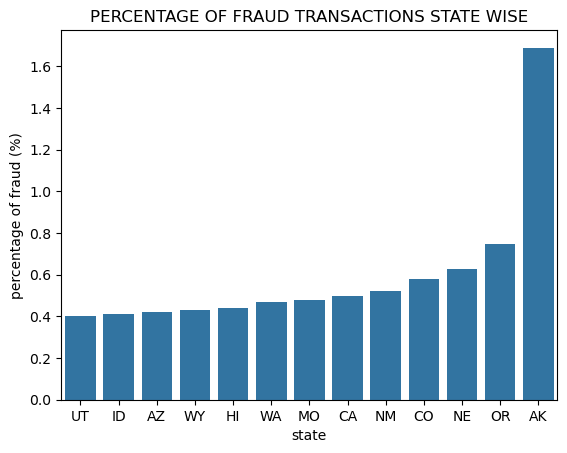

In [67]:
sns.barplot(new2_sorted, x='state', y='percentage of fraud (%)', errorbar=None).set(title='PERCENTAGE OF FRAUD TRANSACTIONS STATE WISE')

## Summary of EDA

1. The dataset did not have any nulls/ empty values. However, there were unwanted columns that would not add value to EDA. So they were dropped.
2. Few transformations like conversion of data types, inclusion of new columns were done.
3. 'grocery_pos' category had the highest number of fraud transactions, followed by 'shipping_net' and 'misc_net'.
4. Howeevr, the amount of money lost in fraud is highest for 'shopping_net'.
5. Highest number of fraud transactions where witnessed in Oct-2019 and the lowest was in Apr-2020. There is no proper trend in the pattern. Spikes are visible instead.
6. HI , AK are states with high fraud amount. However, highest number of fraud transactions are seen in CA followed by MO.
7. On comparing amount and count stats, CA state is high on frauds.
8. AK has highest percentage of fraud transactions. 